In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [67]:
df = pd.read_csv('df_final.csv', sep=';', index_col=0)

In [6]:
df

,primaryTitle,title,frenchTitle,startYear,genres,production_countries,runtimeMinutes,revenue,tagline,overview,id,averageRating,numVotes,actor,actress,director,producer,writer
tconst,,,,,,,,,,,,,,,,,,
tt0010307,J'accuse!,J'accuse,J'accuse,1919,"Horror, War, Romance, Drama, History",FR,166,0.0,NaN,"The story of two men, one married, the other t...",70804,7.7,2240,"Blaise Cendrars, Maxime Desjardins, Paul Duc, ...","Angèle Guys, Elizabeth Nizan, Mancini, Maryse ...",Abel Gance,Charles Pathé,Abel Gance
tt0013933,The Faithful Heart,Cœur fidèle,Coeur fidèle,1923,"Romance, Drama",FR,87,0.0,NaN,The good guys win out in this sweet tale about...,67440,7.4,1540,"Claude Benedict, Edmond Van Daële, Léon Mathot","Gina Manès, Madame Maufroy, Madeleine Erickson...",Jean Epstein,NaN,"Jean Epstein, Marie Epstein"
tt0015014,L'inhumaine,L'Inhumaine,L'inhumaine,1924,"Romance, ScienceFiction, Drama, Mystery",FR,135,0.0,NaN,"A famous singer Claire Lescot, who lives on th...",54539,7.2,1134,"Fred Kellerman, Jaque Catelain, Las Bonambella...","Georgette Leblanc, Kiki of Montparnasse, Marce...",Marcel L'Herbier,Marie-Laure de Noailles,"Georgette Leblanc, Joris-Karl Huysmans, Marcel..."
tt0017075,The Lodger: A Story of the London Fog,The Lodger: A Story of the London Fog,Les cheveux d'or,1927,"Thriller, Drama, Crime, Mystery",GB,92,0.0,NaN,London. A mysterious serial killer brutally mu...,2760,7.3,14289,"Arthur Chesney, Ivor Novello, Malcolm Keen, Re...","Daisy Campbell, Eve Gray, June Tripp, Marie Au...",Alfred Hitchcock,NaN,"Eliot Stannard, Marie Belloc Lowndes"
tt0017196,Nana,Nana,Nana,1926,"Romance, Drama",FR,150,0.0,NaN,"A government official, Count Muffat, falls und...",66812,6.6,1011,"Claude Autant-Lara, Jean Angelo, Karl Harbache...","Catherine Hessling, Jacqueline Forzane, Valesk...",Jean Renoir,Jean Renoir,"Denise Leblond, Pierre Lestringuez, Émile Zola"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9902160,Herself,Herself,Herself,2020,Drama,"IE,GB",97,0.0,Life under construction,Struggling to provide her daughters with a saf...,653708,7.0,5099,"Art Kearns, Ian Lloyd Anderson, Shadaan Felfeli","Anita Petry, Cathy Belton, Clare Dunne, Ericka...",Phyllida Lloyd,"Ed Guiney, Rory Gilmartin, Sharon Horgan","Clare Dunne, Malcolm Campbell"
tt9904802,Enemy Lines,Enemy Lines,Enemy Lines,2020,"Drama, Action, War",GB,92,0.0,Courage has no border.,"In the frozen, war torn landscape of occupied ...",679796,4.6,2041,"Corey Johnson, Daniel Jillings, Ed Westwick, G...",Maria Bondareva,Anders Banke,"Aleksandr Kushaev, Andy Thompson, Nadzeya Huse...","Michael Wright, Tom George"
tt9908390,Le lion,The Lion,Le lion,2020,Comedy,FR,95,0.0,NaN,A psychiatric hospital patient pretends to be ...,589970,5.5,1497,"Aksel Ustun, Benoît Pétré, Dany Boon, Mathieu ...","Anne Serra, Carole Brana, Sophie Verbeeck",Ludovic Colbeau-Justin,"Jean-Yves Robin, Marc Stanimirovic, Serge Hayat","Alexandre Coquelle, Matthieu Le Naour"


In [8]:
df.describe()

,startYear,runtimeMinutes,revenue,id,averageRating,numVotes
count,12665.000000,12665.000000,1.266500e+04,1.266500e+04,12665.000000,1.266500e+04
mean,2004.334386,100.866403,7.959074e+06,2.708402e+05,6.068006,1.789152e+04
std,17.705929,18.336841,5.654873e+07,2.885642e+05,1.132547,8.663695e+04
min,1919.000000,61.000000,0.000000e+00,1.600000e+01,1.300000,6.000000e+00
25%,1998.000000,90.000000,0.000000e+00,4.127100e+04,5.500000,3.150000e+02
50%,2010.000000,98.000000,0.000000e+00,1.285930e+05,6.300000,1.307000e+03
75%,2017.000000,108.000000,0.000000e+00,4.500500e+05,6.800000,5.482000e+03
max,2025.000000,240.000000,2.923706e+09,1.121899e+06,9.700000,3.019825e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12665 entries, tt0010307 to tt9916362
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   primaryTitle          12665 non-null  object 
 1   title                 12665 non-null  object 
 2   frenchTitle           12665 non-null  object 
 3   startYear             12665 non-null  int64  
 4   genres                12665 non-null  object 
 5   production_countries  12665 non-null  object 
 6   runtimeMinutes        12665 non-null  int64  
 7   revenue               12665 non-null  float64
 8   tagline               4907 non-null   object 
 9   overview              12458 non-null  object 
 10  id                    12665 non-null  int64  
 11  averageRating         12665 non-null  float64
 12  numVotes              12665 non-null  int64  
 13  actor                 12552 non-null  object 
 14  actress               12276 non-null  object 
 15  director    

In [ ]:
#

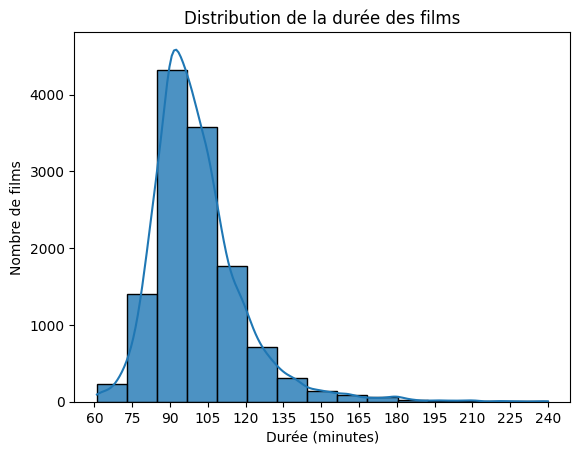

In [60]:
sns.histplot(data=df,x='runtimeMinutes', bins=15, kde=True, legend=False, alpha=0.8)

plt.title('Distribution de la durée des films')
max_rt = df["runtimeMinutes"].max()
plt.xticks(np.arange(60, max_rt + 15, 15))
plt.xlabel('Durée (minutes)')
plt.ylabel('Nombre de films')

plt.show()

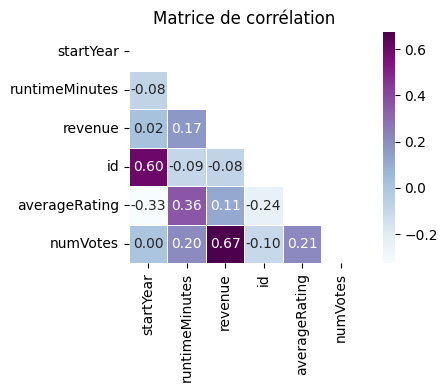

In [56]:
# Créer un dataframe avec les variables numériques
numeric_df = df.select_dtypes(include=[np.number])

# Matrice de corrélation entre les variables numériques et affiche de la heatmap
corr = numeric_df.corr()

# Créer un mask pour masquer la moitié supérieure de la matrice
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 3))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='BuPu', mask=mask, square=True, linewidth=.5)
plt.title('Matrice de corrélation')
plt.show()

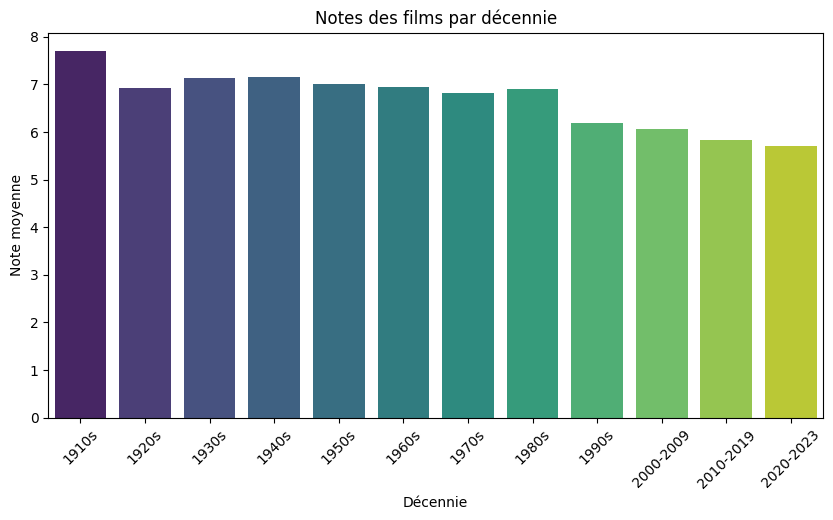

In [71]:
# Graphique des notes des films par décennie
df['year'] = pd.to_datetime(df['startYear'], format='%Y')
df['year'] = df['year'].dt.year
# Créer une nouvelle colonne pour la décennie
df['decade'] = (df['year'] // 10) * 10
df['decade'] = df['decade'].astype(str) + 's'
df['decade'] = df['decade'].replace({'2000s': '2000-2009', '2010s': '2010-2019', '2020s': '2020-2023'})
# Créer un dataframe avec les notes moyennes par décennie
df_decade = df.groupby('decade')['averageRating'].mean().reset_index()
# Créer un graphique à barres  
plt.figure(figsize=(10, 5))
sns.barplot(data=df_decade, x='decade', y='averageRating', palette='viridis', hue='decade')
plt.title('Notes des films par décennie')
plt.xlabel('Décennie')
plt.ylabel('Note moyenne')
plt.xticks(rotation=45)
plt.show()